In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import scipy
from scipy import stats
import math

In [3]:
#reading data into notebook
train_identity = pd.read_csv(r'train_identity.csv')
test_identity = pd.read_csv(r'test_identity.csv')
test_transaction = pd.read_csv(r'test_transaction.csv')
train_transaction = pd.read_csv(r'train_transaction.csv')

#print features
print("Features in train_identity:\n", train_identity.columns.tolist())
print(train_identity.dtypes)
print("\nFeatures in train_transaction:\n", train_transaction.columns.tolist())
print(train_transaction.dtypes)
print("\nFeatures in test_identity:\n", test_identity.columns.tolist())
print(test_identity.dtypes)
print("\nFeatures in test_transaction:\n", test_transaction.columns.tolist())
print(test_transaction.dtypes)

Features in train_identity:
 ['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23   

In [4]:
#print null values
missing_train_identity = train_identity.isnull().sum()
missing_train_transaction = train_transaction.isnull().sum()
print("Missing values in train_identity: \n", missing_train_identity[missing_train_identity > 0])
print("\nMissing values in train_transaction:\n", missing_train_transaction[missing_train_transaction > 0])

Missing values in train_identity: 
 id_02           3361
id_03          77909
id_04          77909
id_05           7368
id_06           7368
id_07         139078
id_08         139078
id_09          69307
id_10          69307
id_11           3255
id_13          16913
id_14          64189
id_15           3248
id_16          14893
id_17           4864
id_18          99120
id_19           4915
id_20           4972
id_21         139074
id_22         139064
id_23         139064
id_24         139486
id_25         139101
id_26         139070
id_27         139064
id_28           3255
id_29           3255
id_30          66668
id_31           3951
id_32          66647
id_33          70944
id_34          66428
id_35           3248
id_36           3248
id_37           3248
id_38           3248
DeviceType      3423
DeviceInfo     25567
dtype: int64

Missing values in train_transaction:
 card2      8933
card3      1565
card4      1577
card5      4259
card6      1571
          ...  
V335     508189
V3

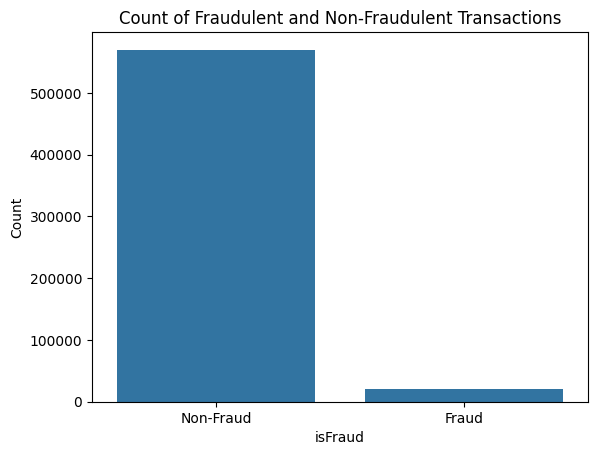

In [5]:
#Counts of Transactions Flagged Fraudulent
fraud_counts = train_transaction['isFraud'].value_counts()
sns.barplot(x=fraud_counts.index.map({0:"Non-Fraud", 1:"Fraud"}), y=fraud_counts.values)
plt.ylabel('Count')
plt.title('Count of Fraudulent and Non-Fraudulent Transactions')
plt.show()

In [6]:
#Correlation between transaction amount and fraudulent classification of transactions.
correlation = train_transaction['TransactionAmt'].corr(train_transaction['isFraud'])
print(correlation)

0.01131982533321524


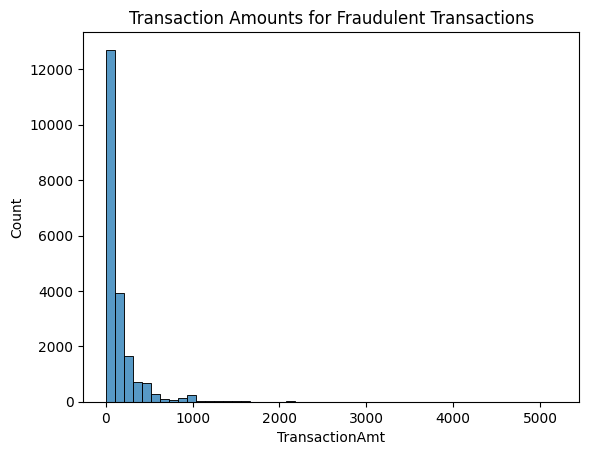

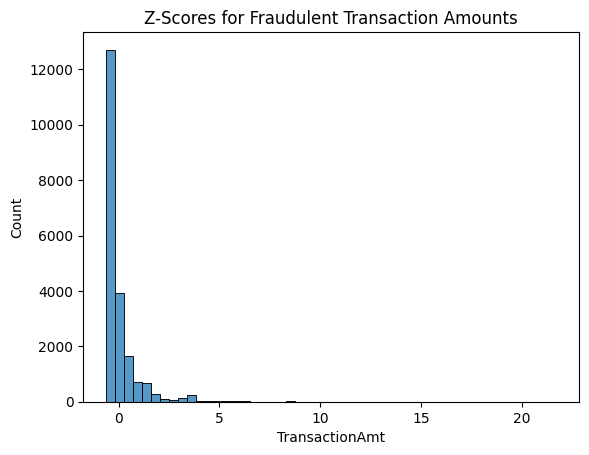

In [7]:
#Z-Test between isFraud and transactionAmt, Outlier Detection
fraudulent_transactions = train_transaction[train_transaction['isFraud']==1]
transaction_amounts = fraudulent_transactions['TransactionAmt']
z_scores = stats.zscore(transaction_amounts)
outliers = fraudulent_transactions[(z_scores > 3)|(z_scores < -3)]

#Distribution of transaction amounts histogram
sns.histplot(transaction_amounts, bins=50)
plt.title('Transaction Amounts for Fraudulent Transactions')
plt.show()

#Plot Z-scores, histogram
sns.histplot(z_scores, bins=50)
plt.title('Z-Scores for Fraudulent Transaction Amounts')
plt.show()

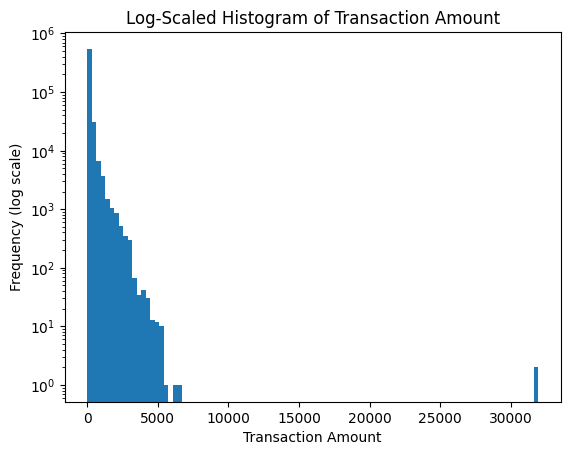

Fraud Ratio in Long-Tail Transactions: 0.024109200496365894


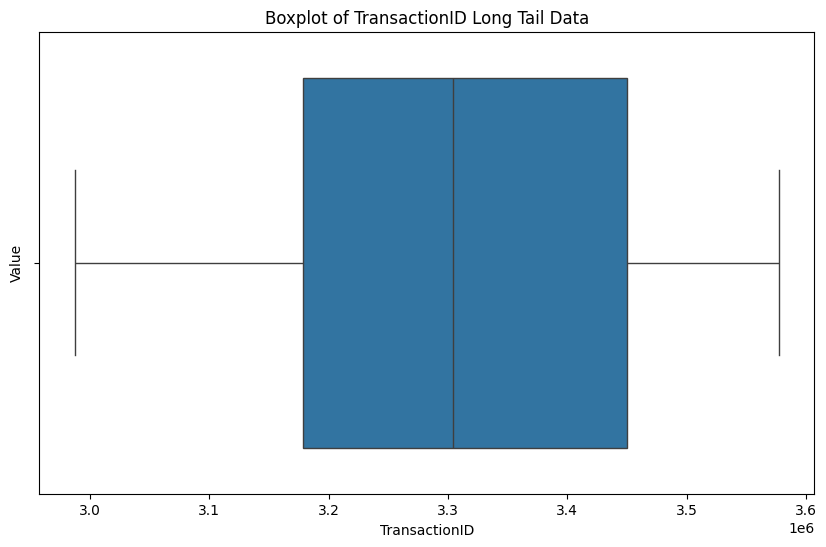

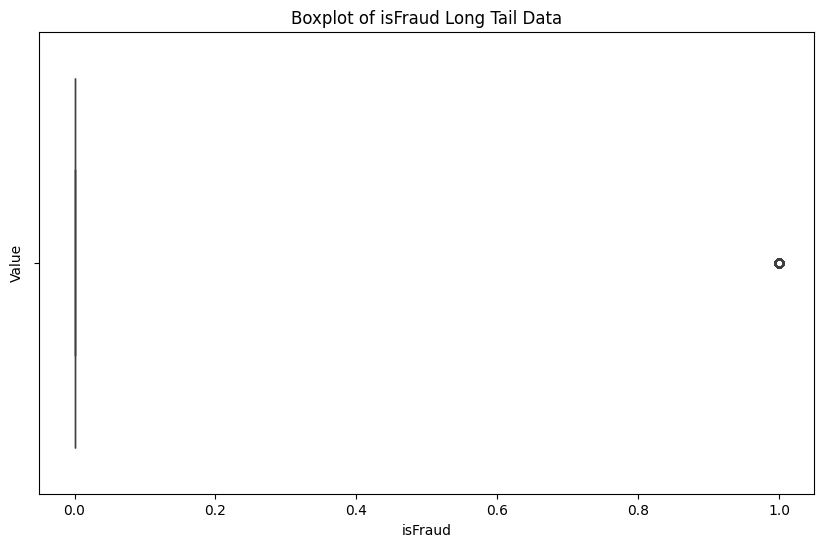

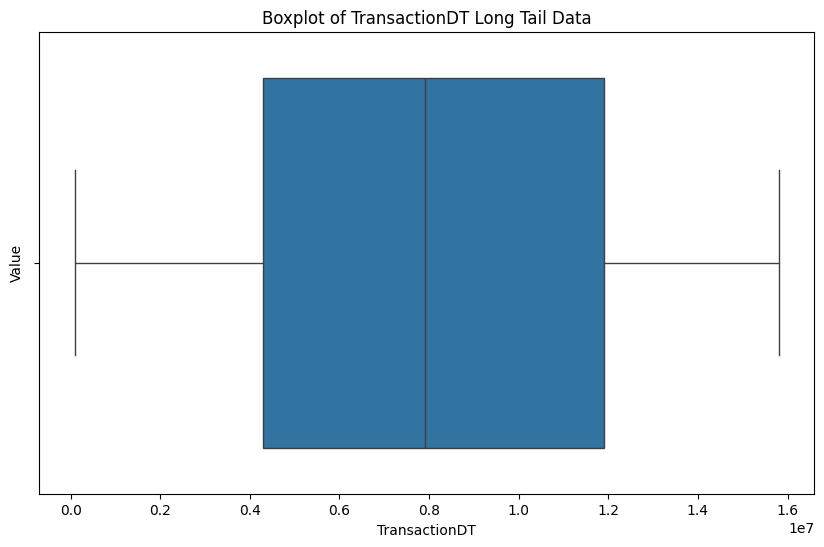

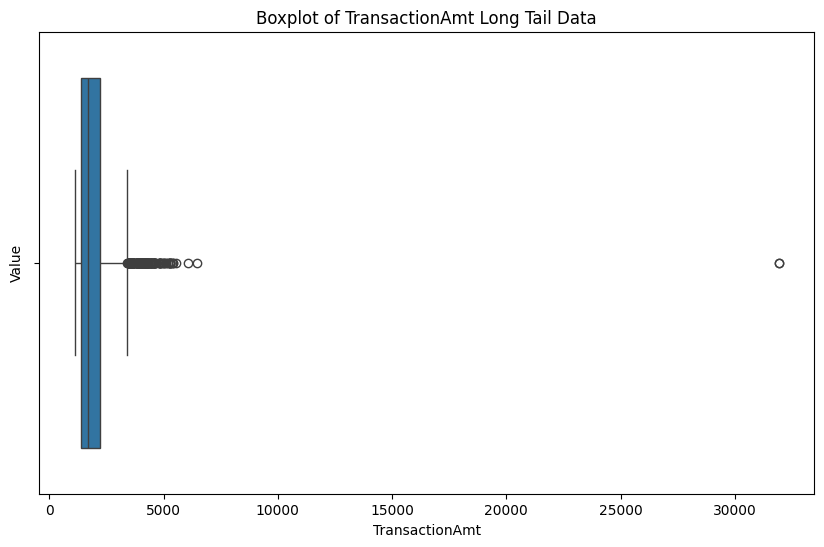

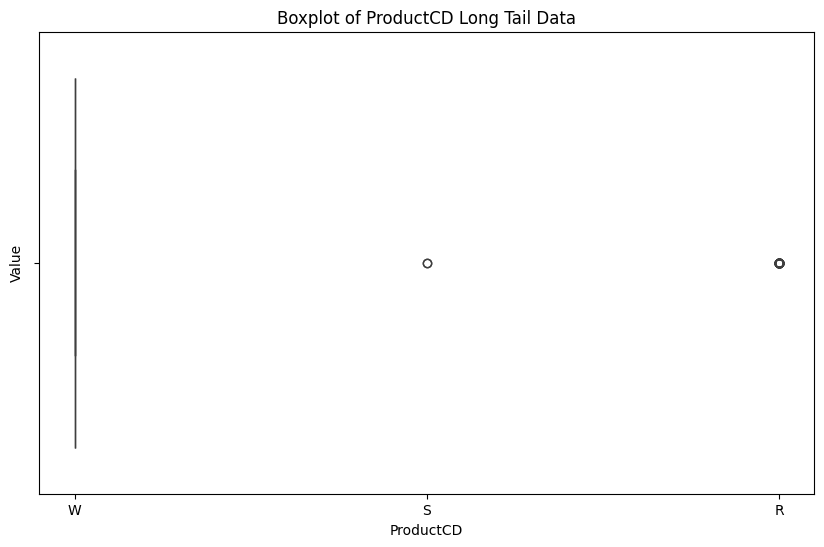

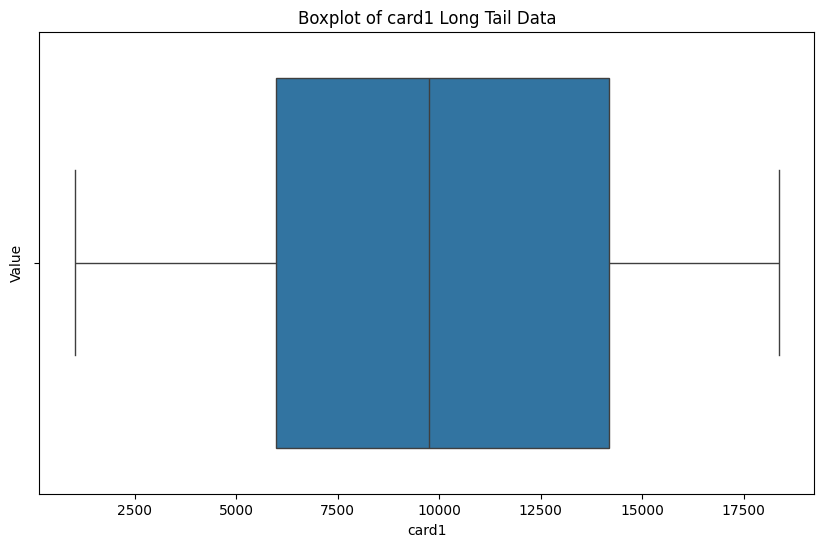

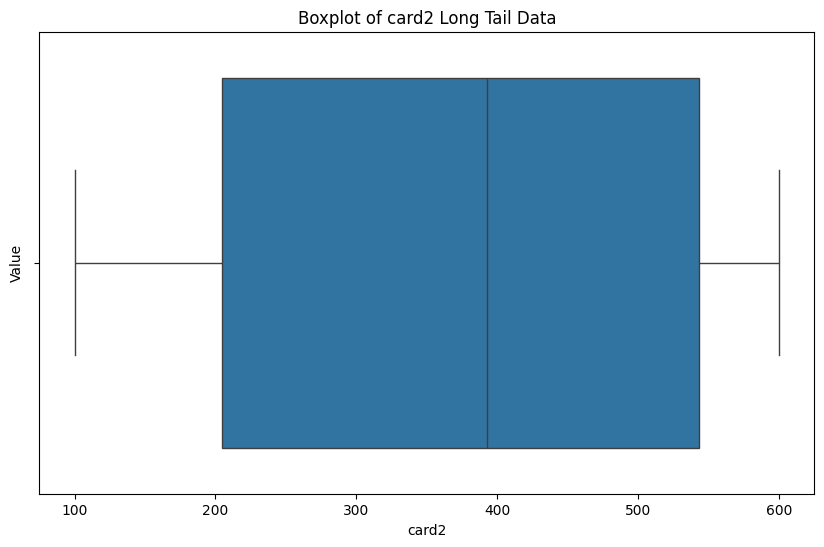

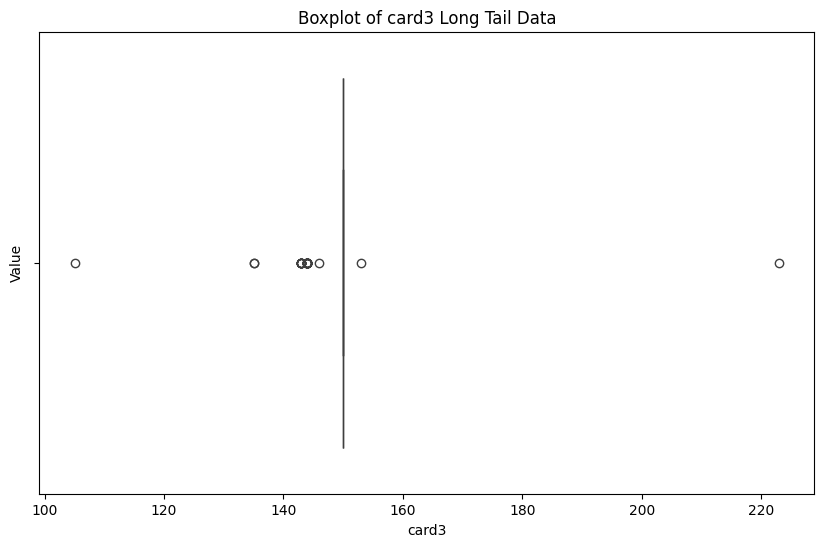

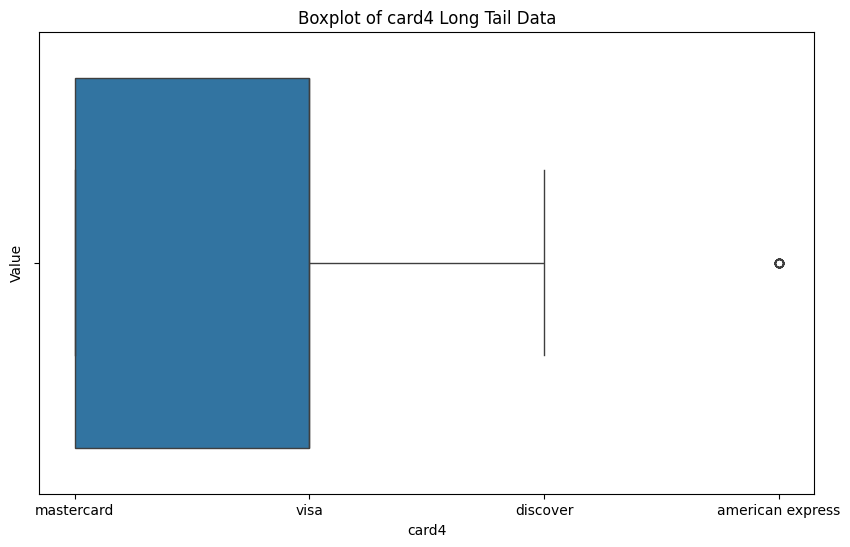

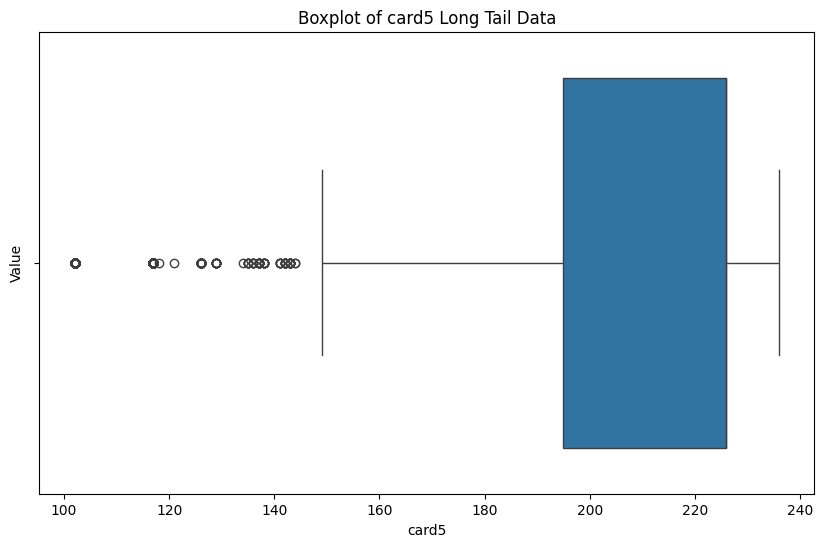

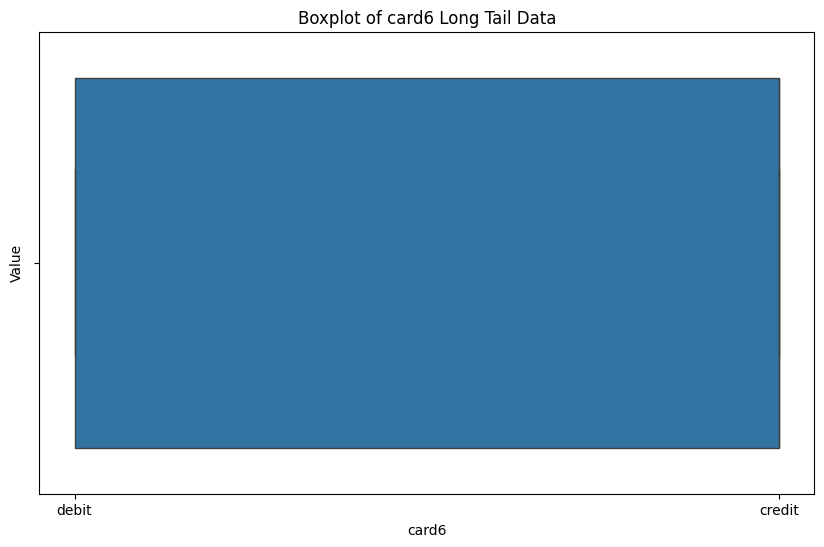

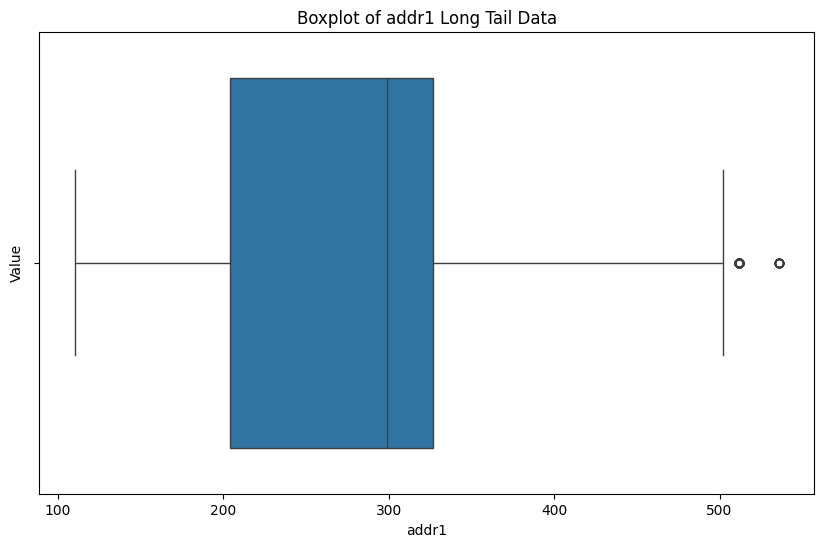

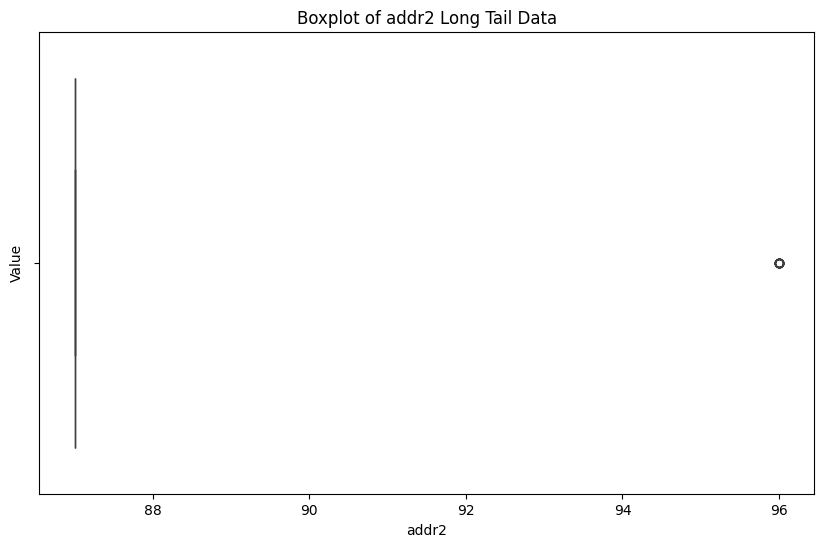

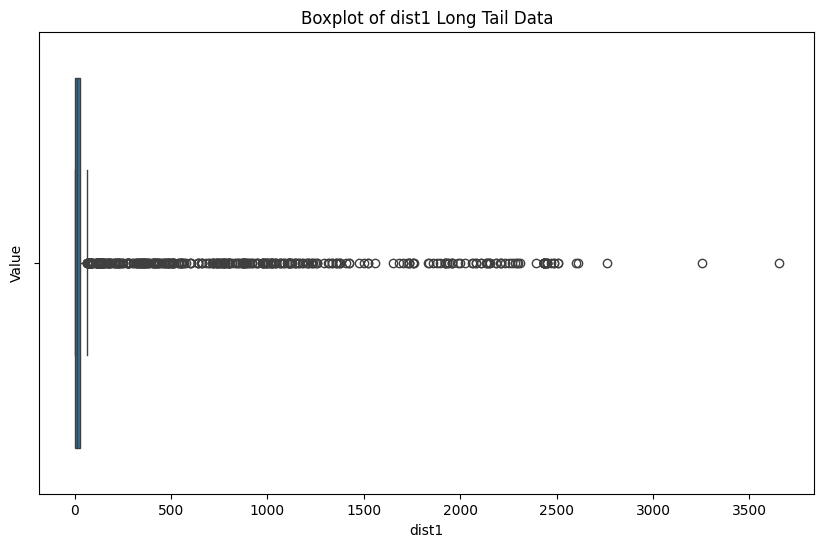

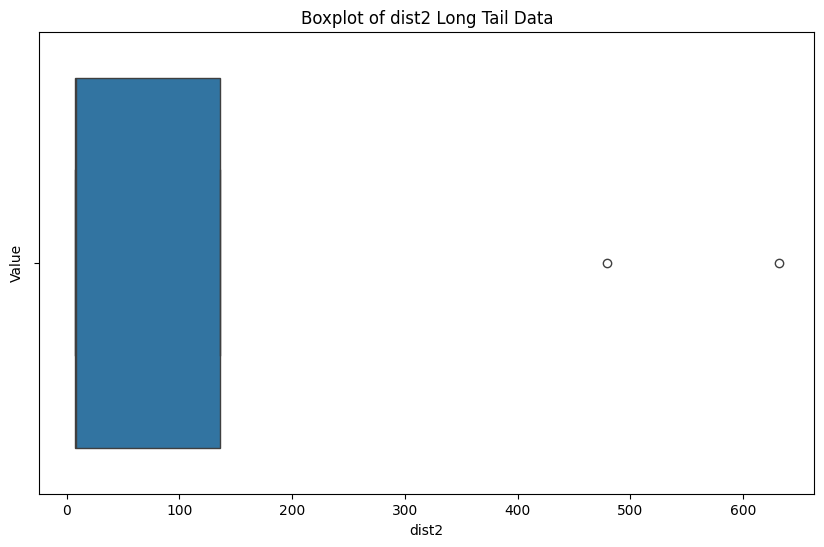

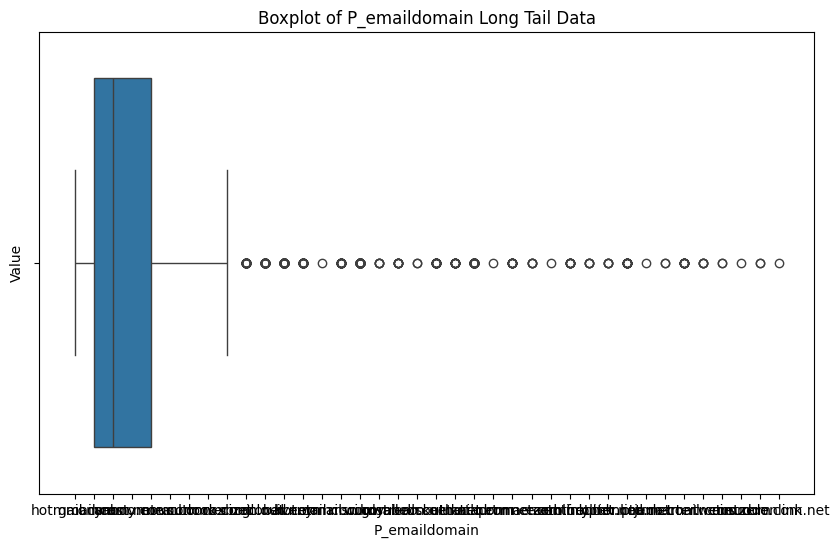

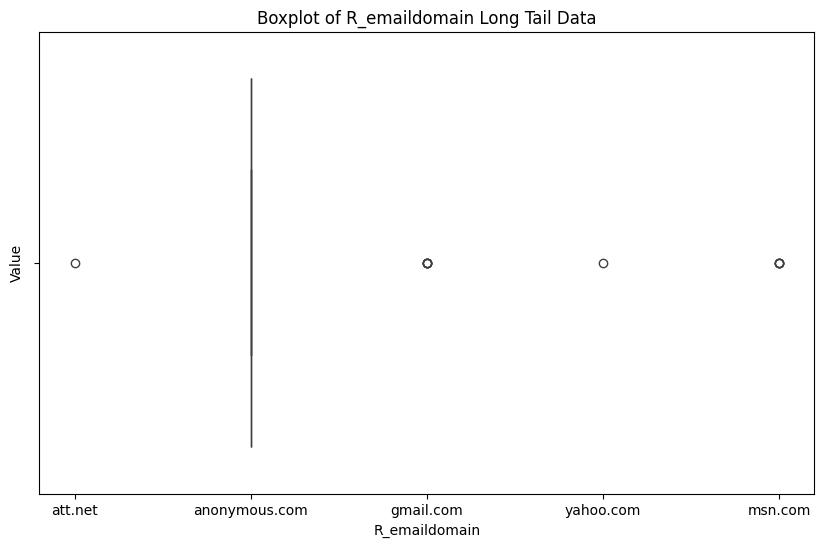

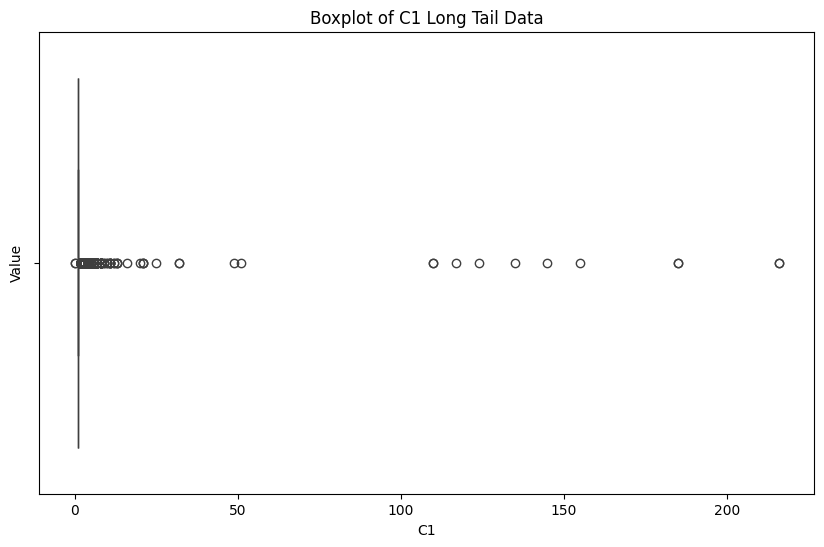

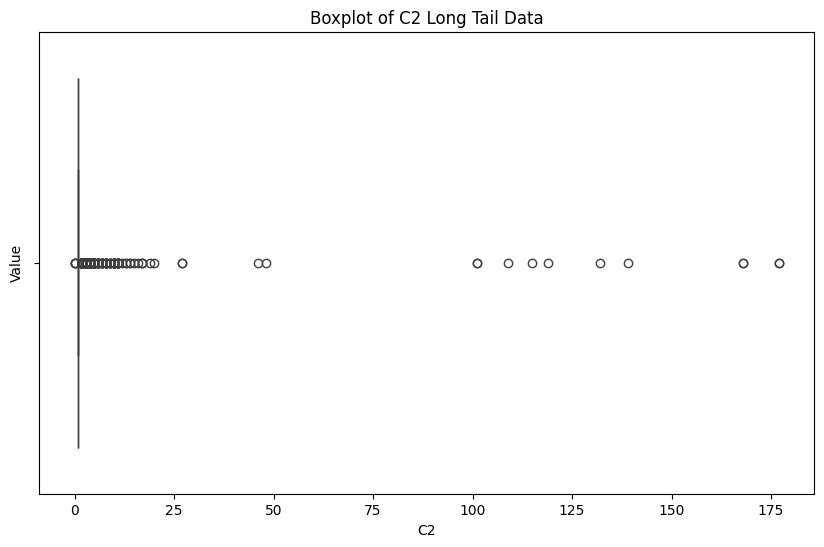

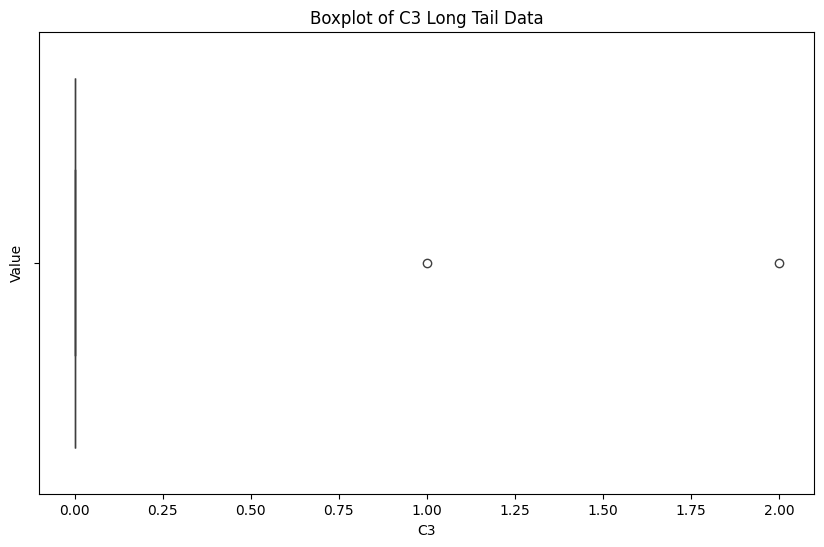

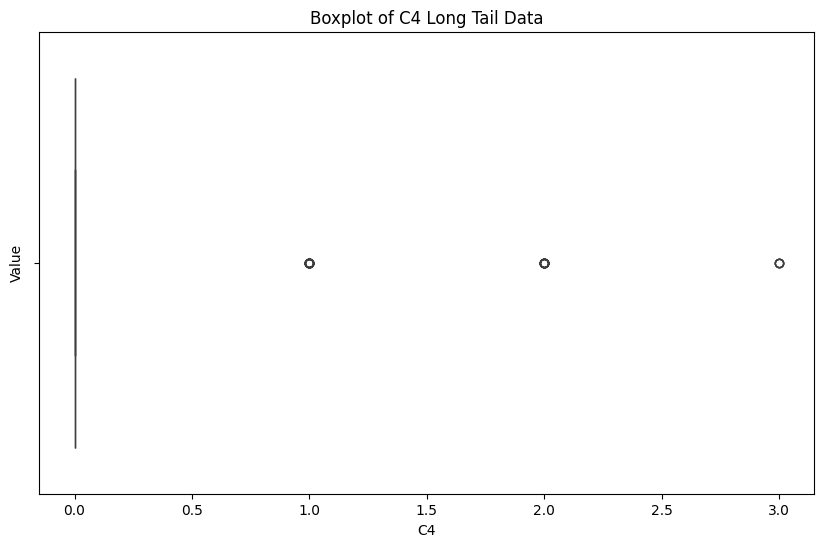

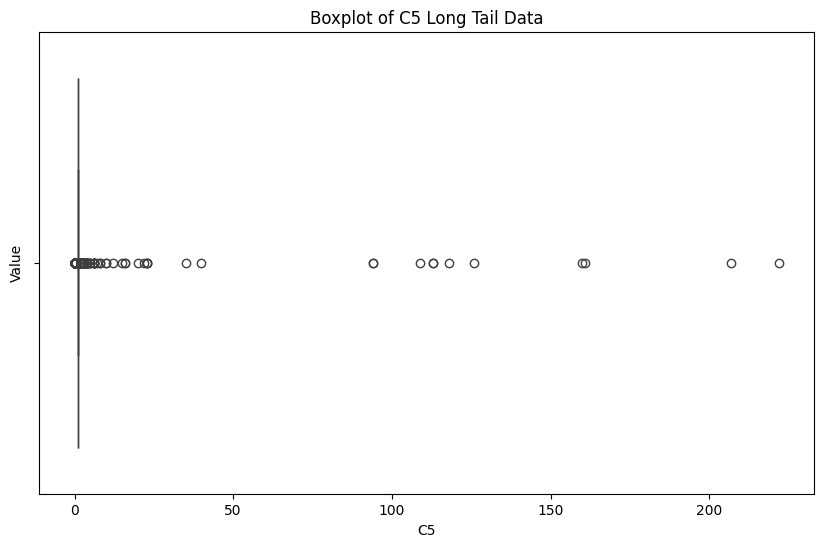

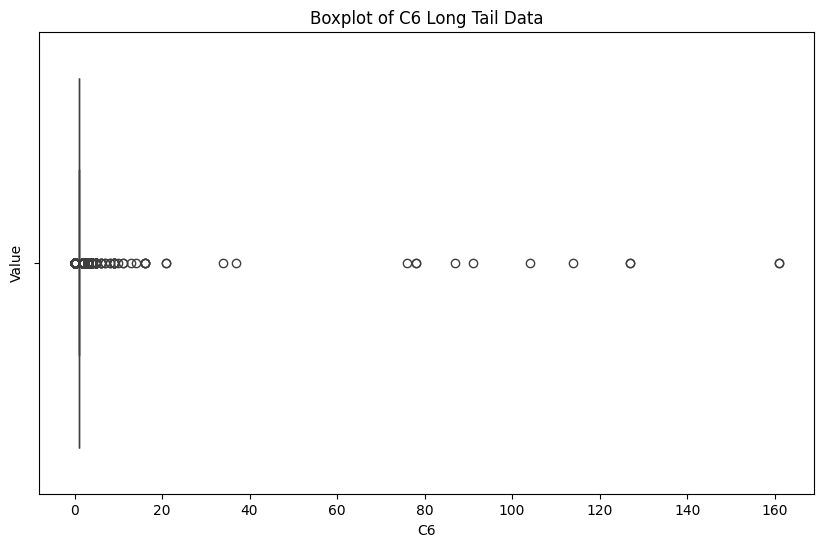

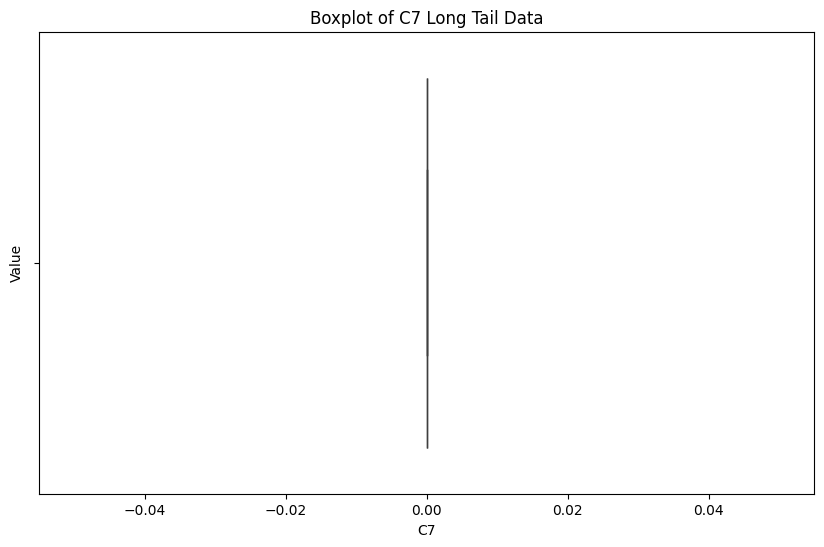

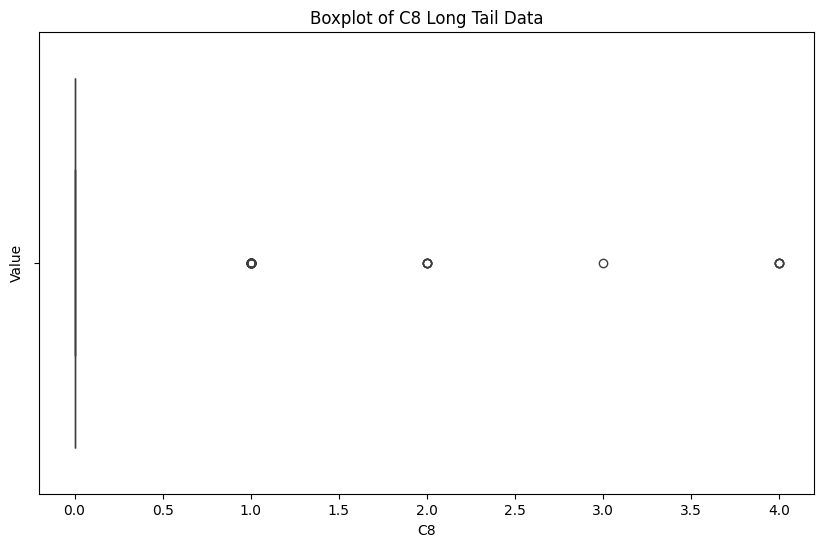

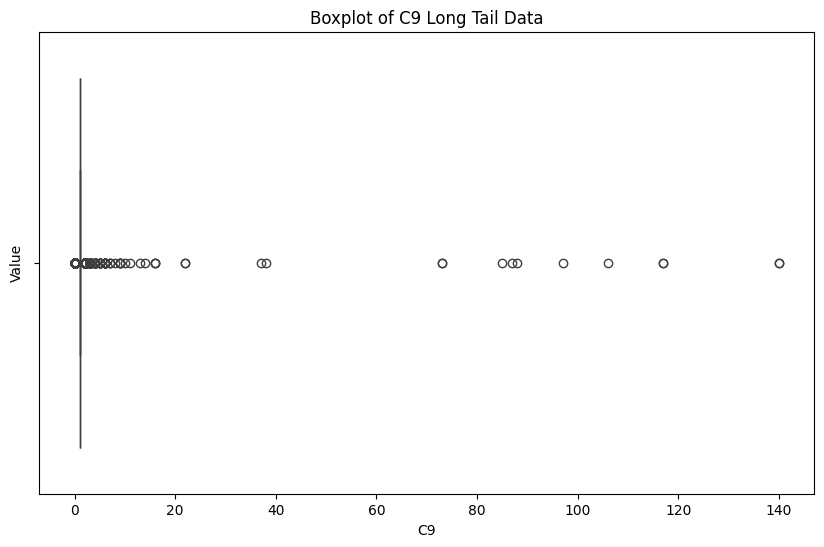

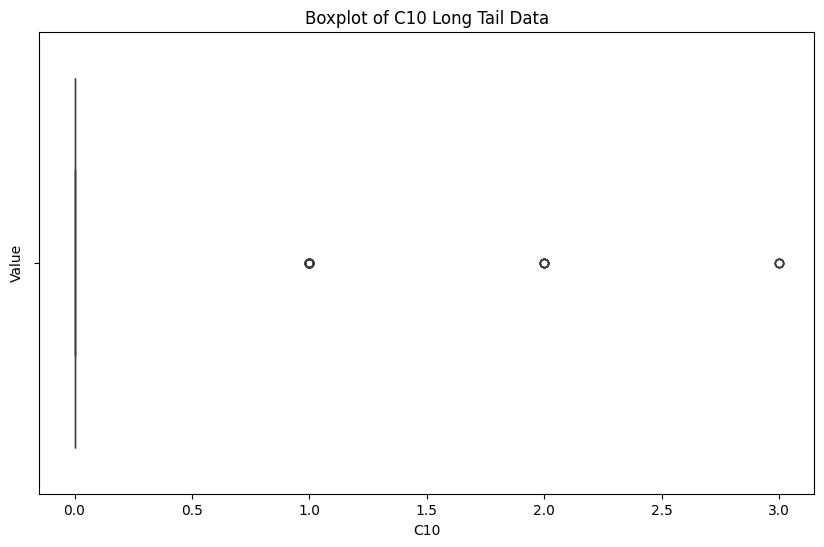

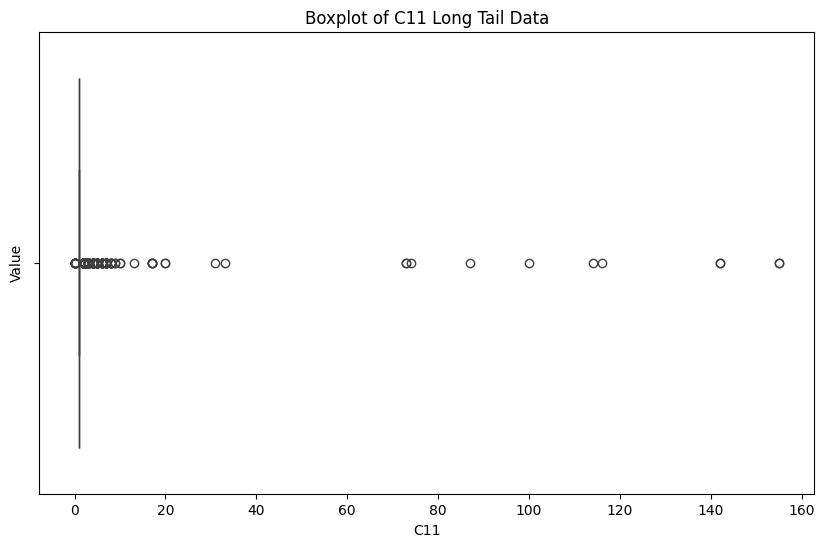

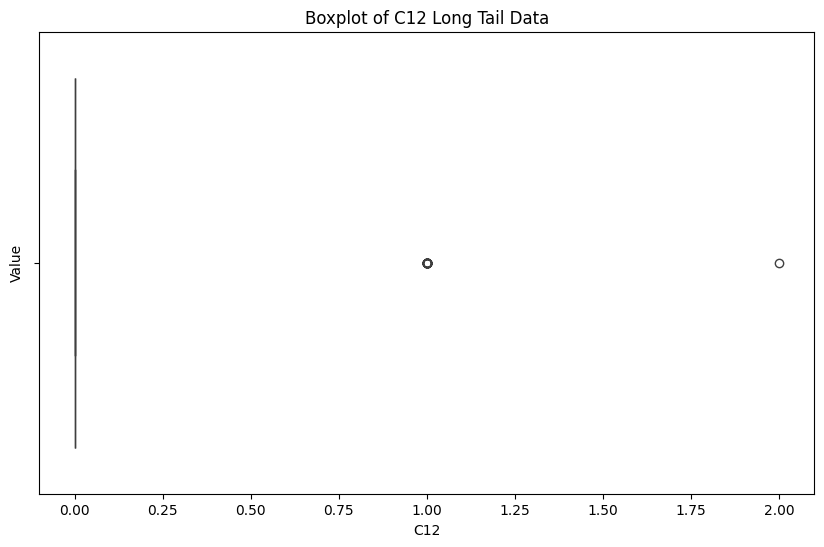

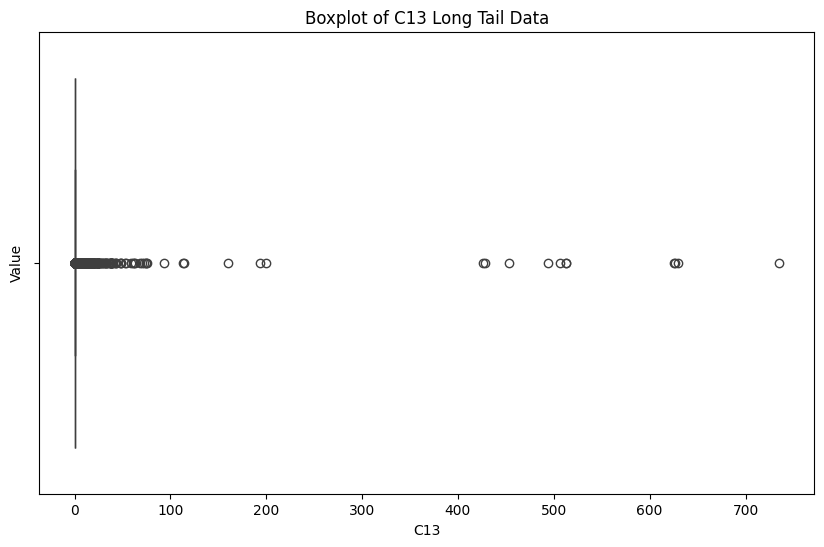

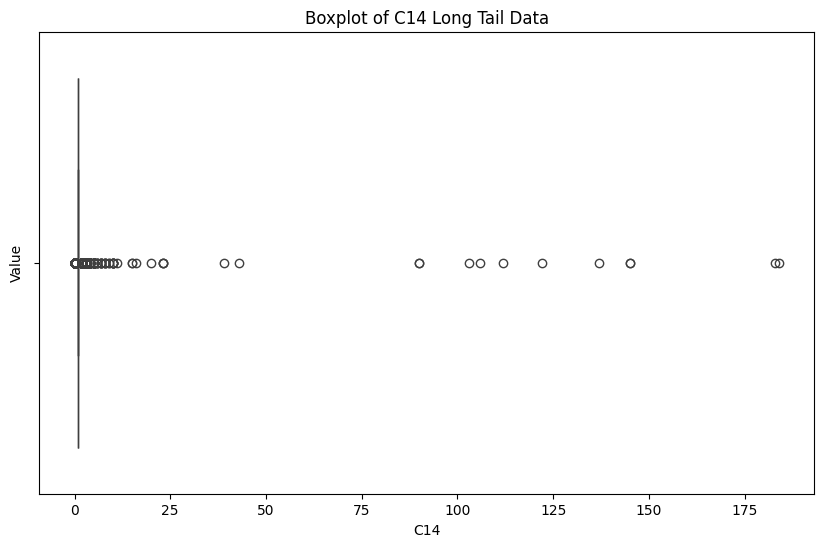

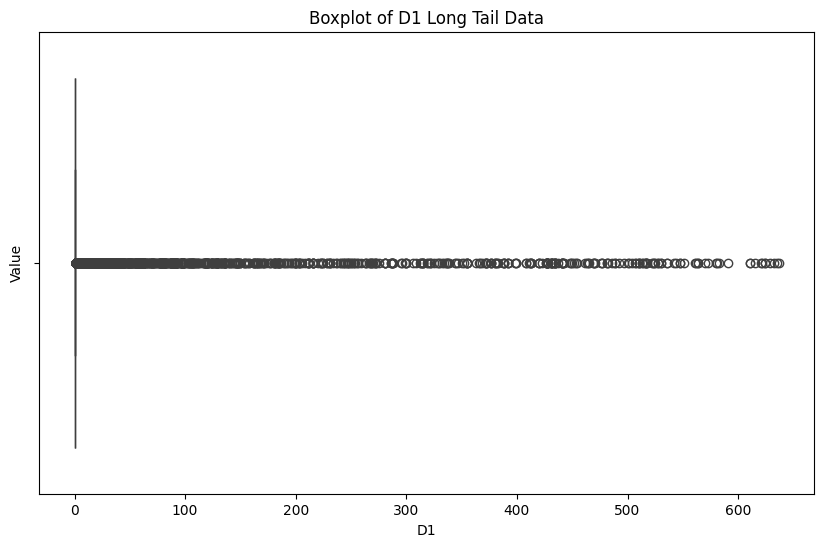

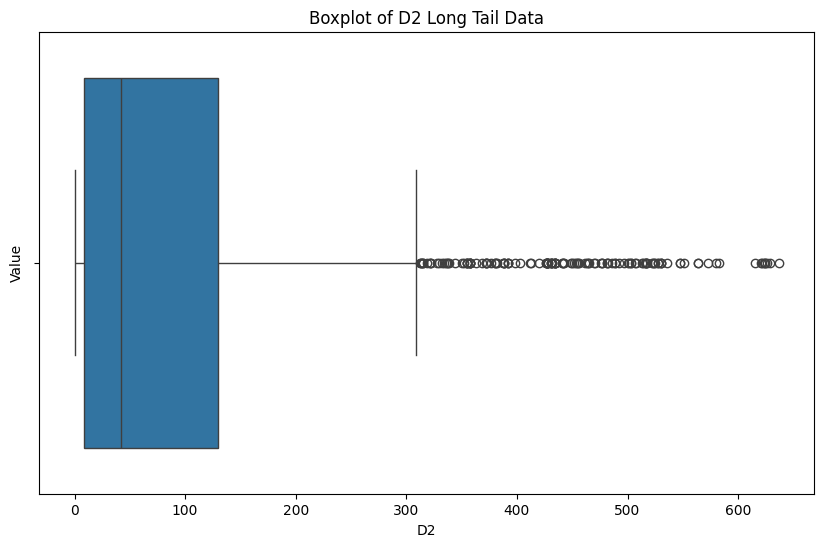

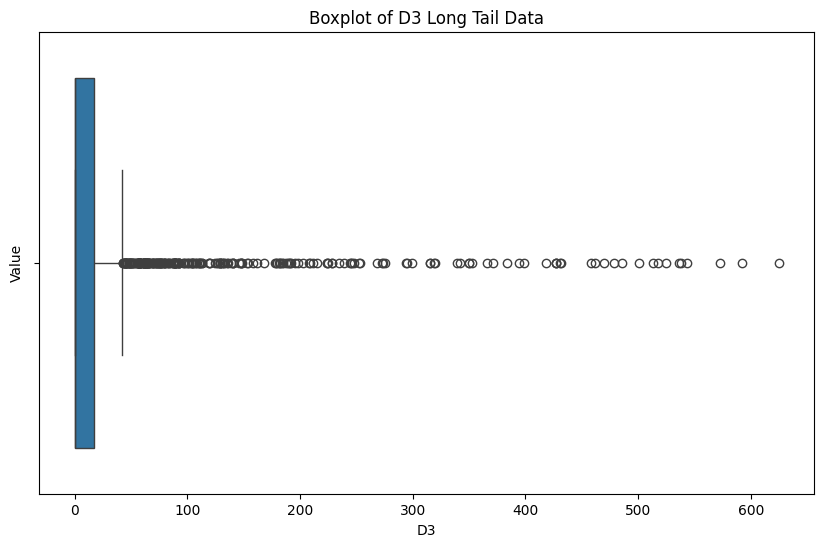

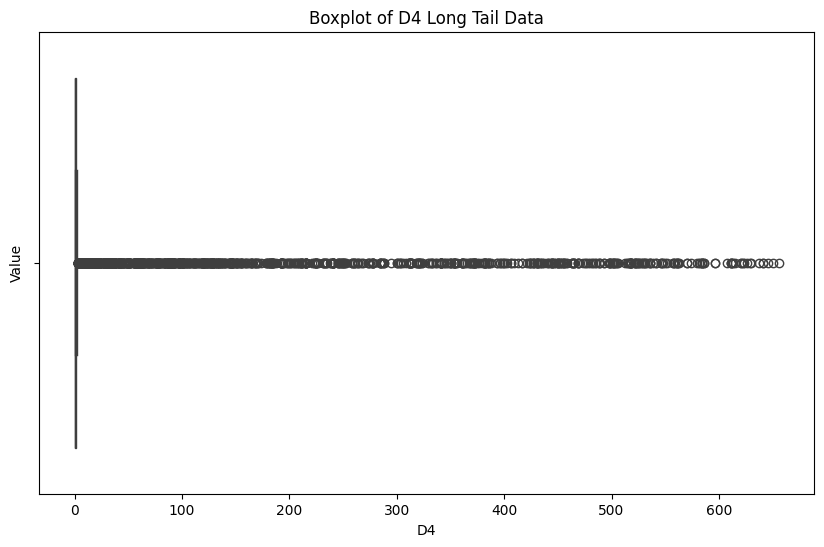

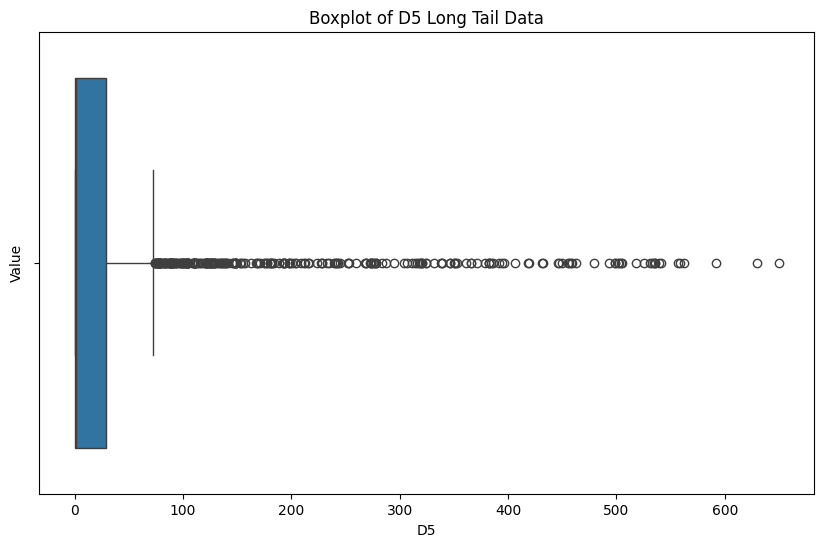

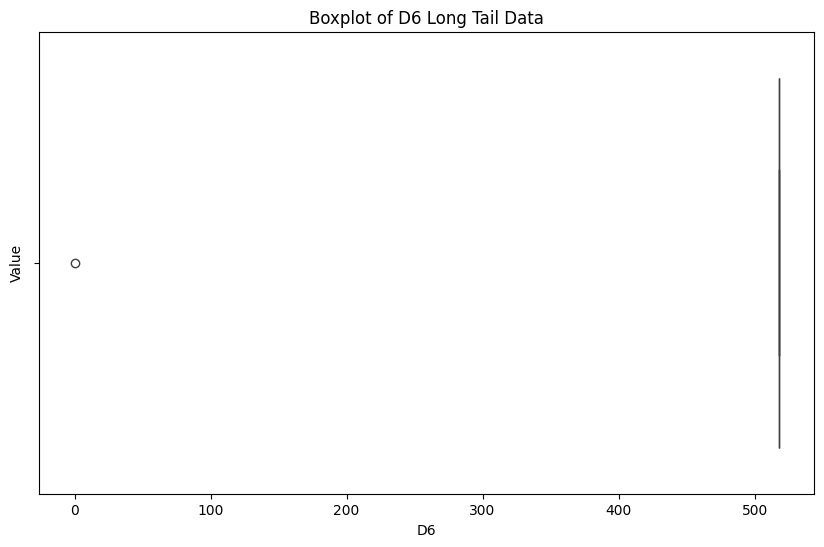

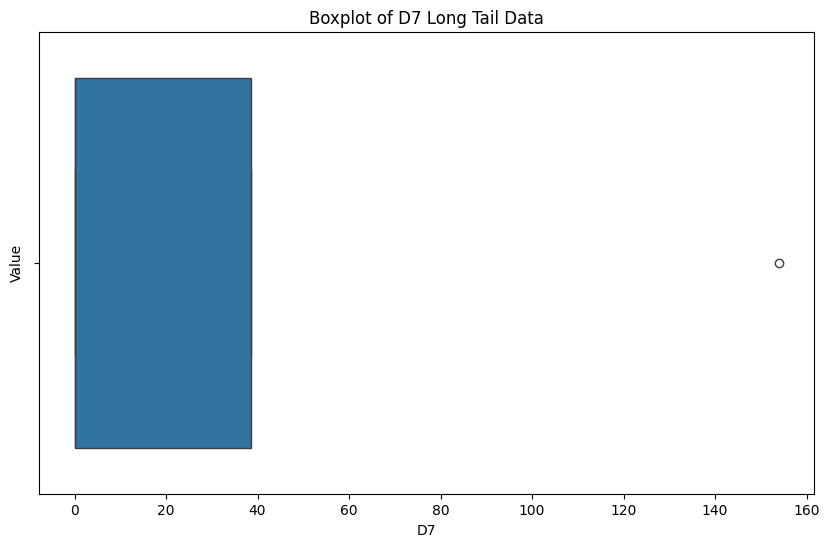

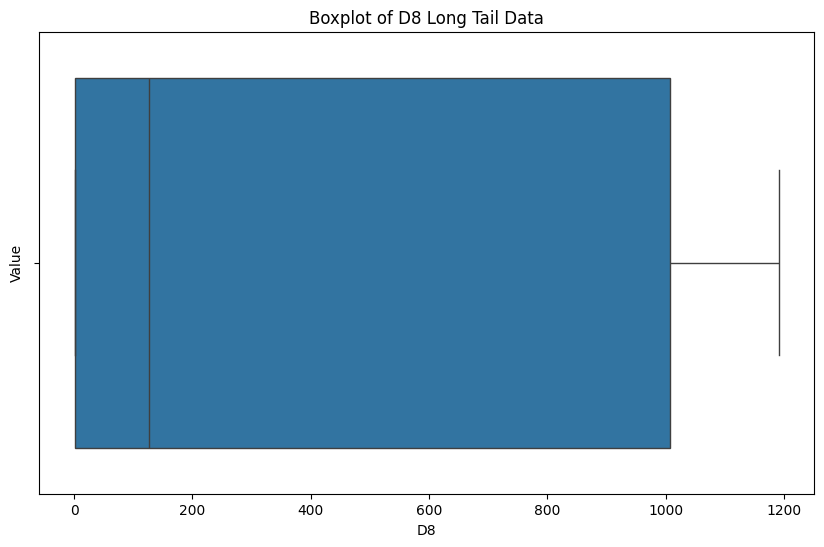

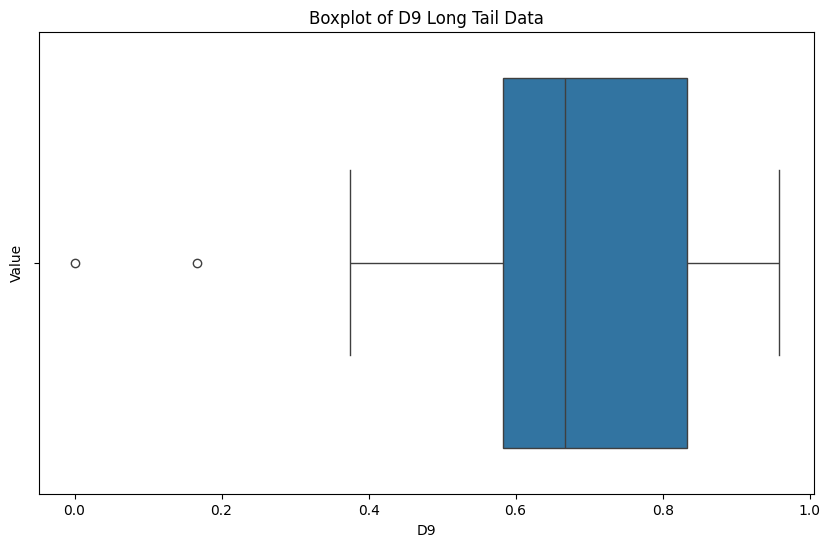

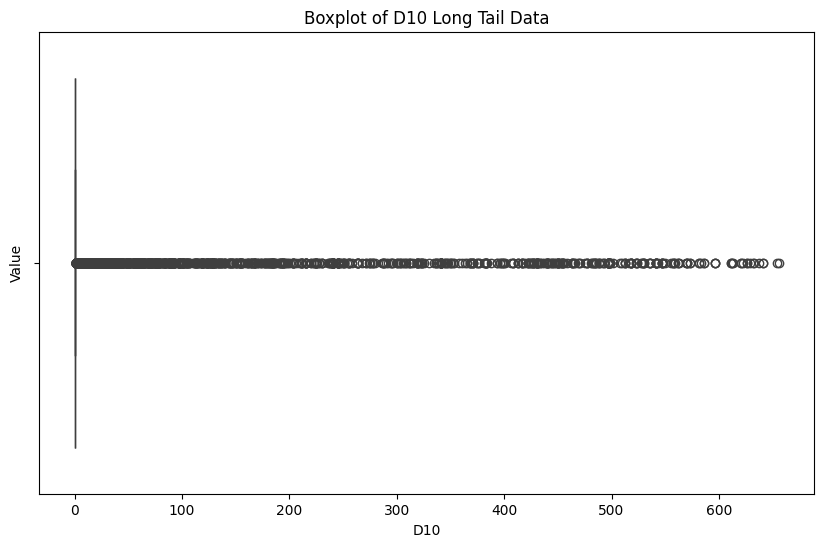

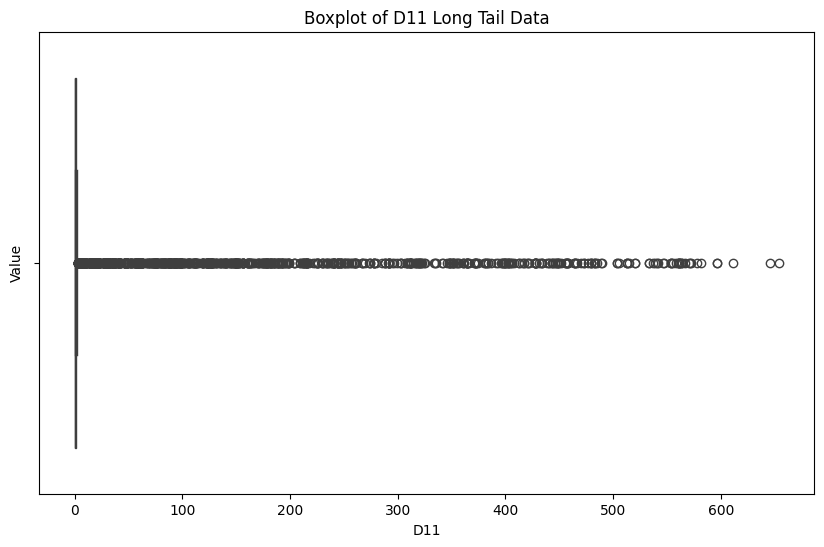

ValueError: List of boxplot statistics and `positions` values must have same the length

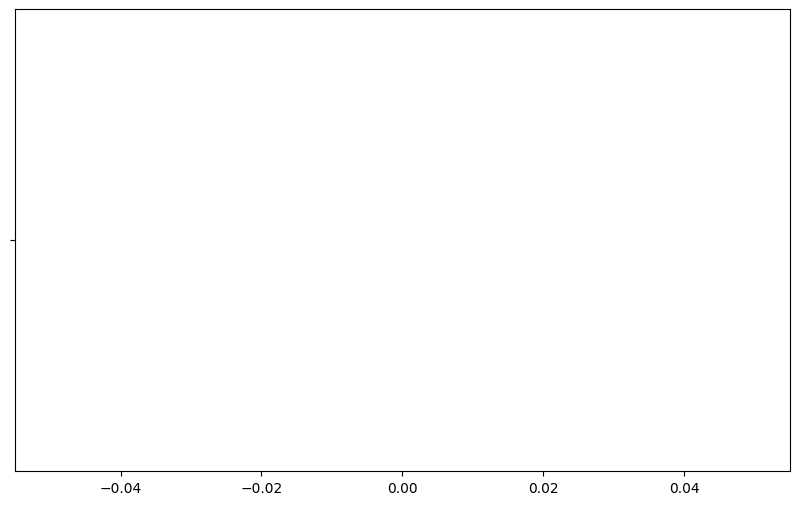

In [8]:
#Long Tail Analysis 
plt.hist(train_transaction['TransactionAmt'],bins=100,log=True)
plt.title('Log-Scaled Histogram of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency (log scale)')
plt.show()

long_tail_threshold = train_transaction['TransactionAmt'].quantile(0.99)
long_tail_data = train_transaction[train_transaction['TransactionAmt'] > long_tail_threshold]
long_tail_fraud_ratio = long_tail_data['isFraud'].mean()
print(f"Fraud Ratio in Long-Tail Transactions: {long_tail_fraud_ratio}")

for feature in long_tail_data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=long_tail_data[feature])
    plt.title(f"Boxplot of {feature} Long Tail Data")
    plt.xlabel(feature)  
    plt.ylabel("Value")
    plt.show()

In [ ]:
pca = PCA(n_components=0.95)  
pca_train = pca.fit_transform(train[numeric_cols])
pca_test = pca.transform(test[numeric_cols])
pca_cols = [f'PC{i}' for i in range(1, train_pca.shape[1] + 1)]
train_pca_df = pd.DataFrame(train_pca, columns=pca_cols, index=train.index)
test_pca_df = pd.DataFrame(test_pca, columns=pca_cols, index=test.index)

train = pd.concat([train, train_pca_df], axis=1)
test = pd.concat([test, test_pca_df], axis=1)

# Optionally drop original numeric columns
train.drop(columns=numeric_cols, inplace=True)
test.drop(columns=numeric_cols, inplace=True)